In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/sm-joo/sm-joo/master/DEXKOUS.csv', parse_dates=['DATE'], index_col='DATE')

In [3]:
df.columns=['KOUS']
df['KOUS'].replace('.', '', inplace=True)
df['KOUS']=pd.to_numeric(df['KOUS'])
df['KOUS'].fillna(method='ffill', inplace=True)

In [4]:
df=df[(df.index>'2019-01-01')&(df.index<'2020-01-01')]

In [ ]:
# ARIMA(p,k,q) => k 결정

In [5]:
adfuller(df.KOUS)

(-1.834289925068011,
 0.36357542996557135,
 2,
 257,
 {'1%': -3.4560535712549925,
  '5%': -2.8728527662442334,
  '10%': -2.5727985212493754},
 1453.3457437081727)

In [6]:
adfuller(df.KOUS.diff().dropna())
# k=1로 결정 (1차 차분이 안정적이다.)

(-10.572632524492828,
 7.239046680336767e-19,
 1,
 257,
 {'1%': -3.4560535712549925,
  '5%': -2.8728527662442334,
  '10%': -2.5727985212493754},
 1446.168602565303)

In [ ]:
#ARIMA(p,k,q) => p, q 결정

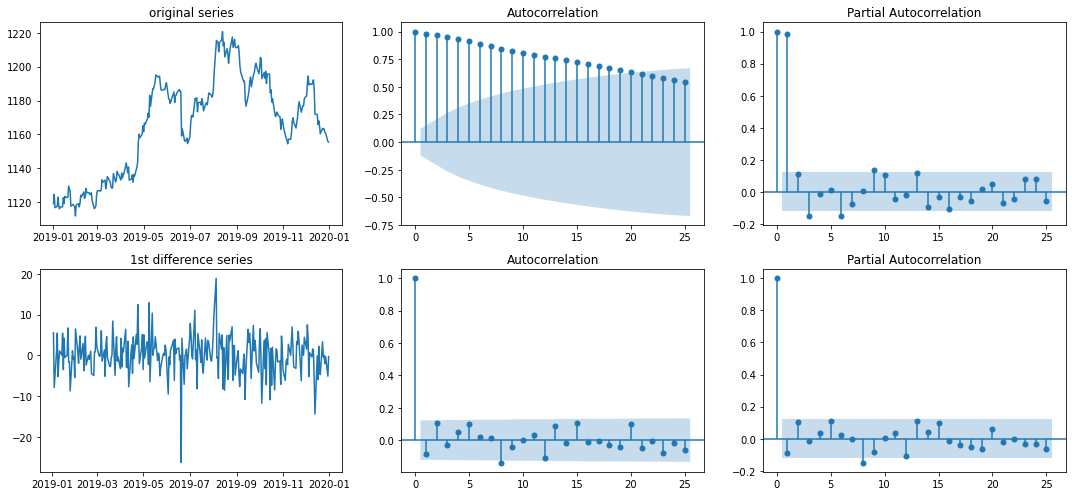

In [7]:
# 2x3 subplot 
figure, axes= plt.subplots(2, 3, figsize=(15,7))
axes[0,0].plot(df.KOUS)
axes[0,0].set_title('original series')
axes[1,0].plot(df.KOUS.diff())
axes[1,0].set_title('1st difference series')
plot_acf(df.KOUS,axes[0,1])
plot_pacf(df.KOUS,axes[0,2])
plot_acf(df.KOUS.diff().dropna(),axes[1,1])
plot_pacf(df.KOUS.diff().dropna(),axes[1,2])
plt.tight_layout()
plt.show()

In [ ]:
# AR차수 : 3차 or 1차 
# MA차수 : 2차 or  0차 

In [ ]:
# ARIMA 예측 모델링

In [10]:
# ARIMA의 차수는 (3,1,2) -> (2,1,2)
model=ARIMA(df.KOUS, order=(2,1,2), freq='B')
model_fit= model.fit(trend='nc')
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.KOUS   No. Observations:                  259
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -769.208
Method:                       css-mle   S.D. of innovations              4.715
Date:                Wed, 15 Dec 2021   AIC                           1548.416
Time:                        09:17:59   BIC                           1566.200
Sample:                    01-03-2019   HQIC                          1555.566
                         - 12-31-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.KOUS    -1.2447      0.243     -5.123      0.000      -1.721      -0.768
ar.L2.D.KOUS    -0.7340      0.257     -2.851      0.004      -1.239      -0.229
ma.L1.D.KOUS     1.1778      0.245      4.80

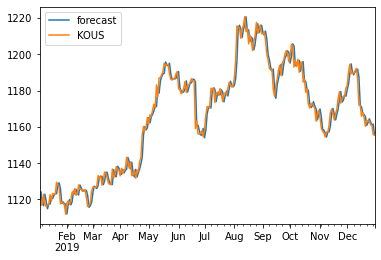

In [11]:
model_fit.plot_predict()
plt.show()

In [12]:
## Training set, Test set을 나누어서 학습과 평가
train=df.iloc[0:30]
test=df.iloc[30:35]
test.shape

(5, 1)

In [13]:
model=ARIMA(train, order=(2,1,2), freq='B')
model_fit=model.fit(trend='nc')
fc, se, conf= model_fit.forecast(5, alpha=0.05)

In [14]:
fc_series=pd.Series(fc, index=test.index)
lower_series=pd.Series(conf[:,0], index=test.index)
upper_series=pd.Series(conf[:,1], index=test.index)

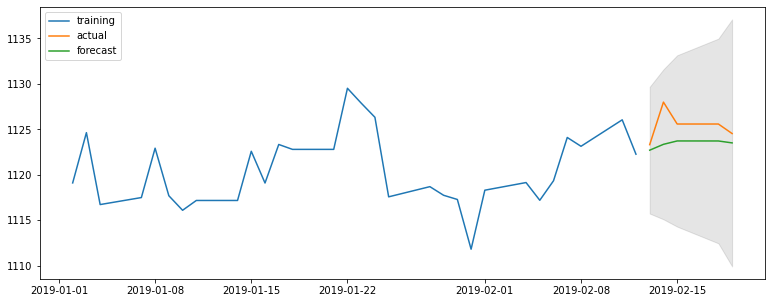

In [15]:
# plot
plt.figure(figsize=(13,5))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(test.index, lower_series, upper_series, color='black', alpha=0.1)
plt.legend(loc='upper left')
plt.show()